In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.interpolate

In [3]:
pd.read_excel('../../../data/age+ploidy_relation.xlsx')

,liver case,age,% 2n,% 4n,> Transfer to 100 % ->,% 2n of 100%,Pathology,Comment
0,ND022,58.0,75.0,19.0,NaN,79.787234,Y,NaN
1,ND023,59.0,85.0,10.0,NaN,89.473684,NaN,#83
2,ND32,39.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ND252,37.0,69.0,17.0,NaN,80.232558,NaN,NaN
4,ND253,33.0,85.0,9.0,NaN,90.425532,NaN,NaN
...,...,...,...,...,...,...,...,...
65,HL#12,70.0,NaN,NaN,NaN,NaN,NaN,NaN
66,HL#13,56.0,NaN,NaN,NaN,NaN,NaN,NaN
67,HL#14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,HL#15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
heinke = pd.read_excel('../../../data/age+ploidy_relation.xlsx')
heinke[['% 2n', '% 4n']] /= 100
heinke['2n'] = heinke['% 2n'] / (heinke['% 2n'] + heinke['% 4n'])
heinke.head()

,liver case,age,% 2n,% 4n,> Transfer to 100 % ->,% 2n of 100%,Pathology,Comment,2n
0,ND022,58.0,0.75,0.19,NaN,79.787234,Y,NaN,0.797872
1,ND023,59.0,0.85,0.10,NaN,89.473684,NaN,#83,0.894737
2,ND32,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ND252,37.0,0.69,0.17,NaN,80.232558,NaN,NaN,0.802326
4,ND253,33.0,0.85,0.09,NaN,90.425532,NaN,NaN,0.904255


In [303]:
kudryavtsev = pd.read_excel('../../../data/kudryavtsev_et_al_1993_table_2.xlsx')
kudryavtsev[kudryavtsev.columns[3:]] /= 100.0
kudryavtsev['age'] = kudryavtsev[['age_min', 'age_max']].mean(axis='columns')
kudryavtsev['2n_mean'] = kudryavtsev['2C_mean'] 
kudryavtsev['2n_sem'] = kudryavtsev['2C_sem'] 
kudryavtsev['2n_std'] = kudryavtsev['2n_sem'] * np.sqrt(kudryavtsev['n'])
kudryavtsev['2x2n_mean'] = kudryavtsev['2Cx2_mean'] 
kudryavtsev['2x2n_sem'] = kudryavtsev['2Cx2_sem'] 
kudryavtsev['2x2n_std'] = kudryavtsev['2x2n_sem'] * np.sqrt(kudryavtsev['n'])

kudryavtsev['all_2n_mean'] = kudryavtsev['2C_mean'] + kudryavtsev['2Cx2_mean'] 
kudryavtsev['all_2n_sem'] = kudryavtsev['2C_sem'] + kudryavtsev['2Cx2_sem'] 
kudryavtsev['all_2n_std'] = kudryavtsev['all_2n_sem'] * np.sqrt(kudryavtsev['n'])

In [304]:
kudryavtsev.head()

,age_min,age_max,n,2C_mean,2C_sem,2Cx2_mean,2Cx2_sem,4C_mean,4C_sem,4Cx2_mean,...,age,2n_mean,2n_sem,2n_std,2x2n_mean,2x2n_sem,2x2n_std,all_2n_mean,all_2n_sem,all_2n_std
0,0,5,6,0.9248,0.0109,0.0288,0.0050,0.0422,0.0063,0.0030,...,2.5,0.9248,0.0109,0.026699,0.0288,0.0050,0.012247,0.9536,0.0159,0.038947
1,6,10,3,0.8850,0.0443,0.0736,0.0225,0.0380,0.0201,0.0020,...,8.0,0.8850,0.0443,0.076730,0.0736,0.0225,0.038971,0.9586,0.0668,0.115701
2,11,15,3,0.9050,0.0311,0.0590,0.0057,0.0270,0.0180,0.0067,...,13.0,0.9050,0.0311,0.053867,0.0590,0.0057,0.009873,0.9640,0.0368,0.063739
3,16,20,10,0.9078,0.0139,0.0707,0.0128,0.0209,0.0334,0.0006,...,18.0,0.9078,0.0139,0.043956,0.0707,0.0128,0.040477,0.9785,0.0267,0.084433
4,21,25,12,0.8656,0.0229,0.0690,0.0107,0.0602,0.0131,0.0026,...,23.0,0.8656,0.0229,0.079328,0.0690,0.0107,0.037066,0.9346,0.0336,0.116394


In [305]:
ploidy = sp.interpolate.UnivariateSpline(kudryavtsev['age'].values,
                                kudryavtsev['all_2n_mean'].values,
                               ext=3)

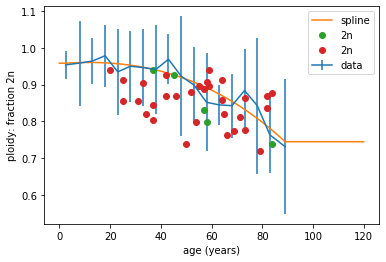

In [306]:
tt = np.linspace(0, 120, 1000)
plt.errorbar(kudryavtsev['age'].values, kudryavtsev['all_2n_mean'].values, kudryavtsev['all_2n_std'].values, label='data')
plt.plot(tt, ploidy(tt), label='spline')

plt.plot("age", "2n", data=heinke.query('Pathology == "Y"'), marker='o', ls='None')
plt.plot("age", "2n", data=heinke.query('Pathology != "Y"'), marker='o', ls='None')

plt.xlabel('age (years)')
plt.ylabel('ploidy: fraction 2n')
plt.legend()
plt.show()

## Best ploidy fit

In [308]:
import pymc3 as pm

In [309]:
def lin(age, c):
    return 1 + c/100*age

In [310]:
with pm.Model() as linear2:
    c = pm.Flat('c')
    d = pm.Flat('d')
    age = kudryavtsev['age'].values + 0.5
    sigma0 = kudryavtsev['2n_std'].values
    sigma1 = pm.HalfNormal('sigma1', 1)
    sigma = sigma0 + sigma1
    mu = lin(age, c) - 1 + d
    C14 = kudryavtsev['2n_mean'].values
    ploidy_2n = pm.Normal('ploidy', mu=mu, sigma=sigma, observed=C14)
    
    map_lin2 = pm.find_MAP()
    trace_lin2 = pm.sample(random_seed=42)

logp = 26.257, ||grad|| = 3.6856: 100%|██████████| 28/28 [00:00<00:00, 3537.90it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma1, d, c]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2554.05draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f388337e748>,
      dtype=object)

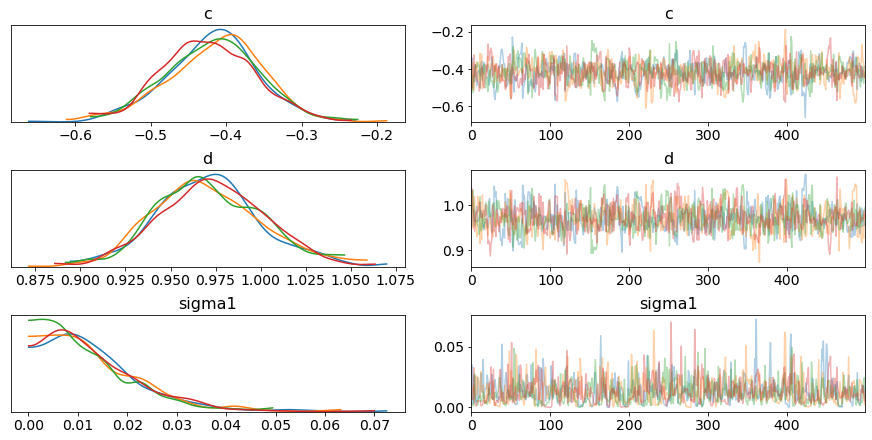

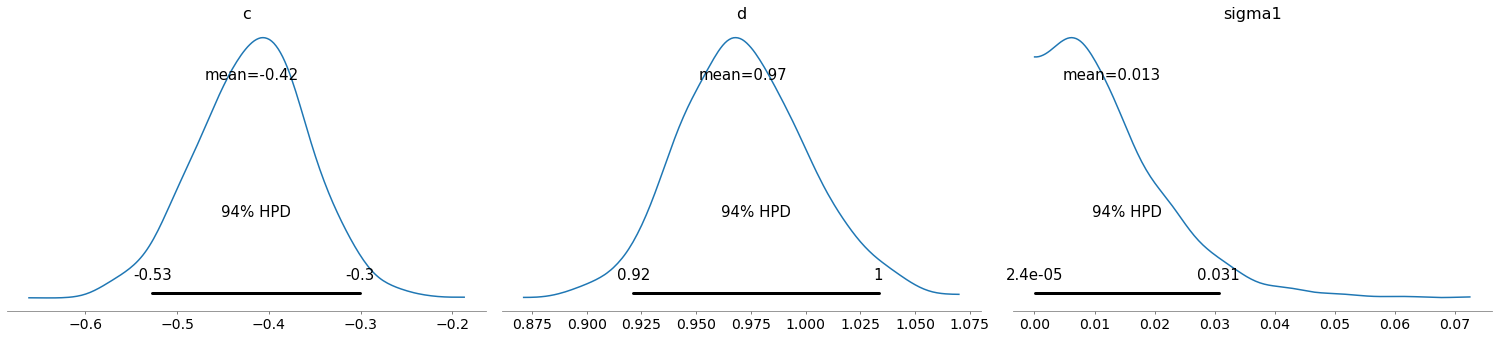

In [311]:
pm.traceplot(trace_lin2)
pm.plot_posterior(trace_lin2)

In [336]:
pm.summary(trace_lin2, round_to=5)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
c,-0.41890,0.06063,-0.52704,-0.30085,0.00207,0.00147,862.10532,851.36300,870.87551,973.60503,1.00083
d,0.97141,0.02949,0.92123,1.03328,0.00103,0.00073,823.41408,822.04265,829.67430,814.61094,1.00082
sigma1,0.01292,0.01013,0.00002,0.03065,0.00033,0.00024,917.19256,917.19256,621.12579,458.09728,1.00504


In [337]:
map_lin2

{'c': array(-0.41931856),
 'd': array(0.9698511),
 'sigma1_log__': array(-5.35784071),
 'sigma1': array(0.00471107)}

In [320]:
with pm.Model() as linear2x2n:
    c = pm.Flat('c')
    d = pm.HalfFlat('d')
    age = kudryavtsev['age'].values + 0.5
    sigma0 = kudryavtsev['2x2n_std'].values
    sigma1 = pm.HalfNormal('sigma1', 1)
    sigma = sigma0 + sigma1
    mu = lin(age, c) - 1 + d
    C14 = kudryavtsev['2x2n_mean'].values
    ploidy_2n = pm.Normal('ploidy', mu=mu, sigma=sigma, observed=C14)
    
    map_lin2x2n = pm.find_MAP()
    print(map_lin2x2n)
    trace_lin2x2n = pm.sample(random_seed=42)

logp = 40.803, ||grad|| = 0.015997: 100%|██████████| 56/56 [00:00<00:00, 3103.77it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


{'c': array(0.19969419), 'd_log__': array(-3.55881833), 'sigma1_log__': array(-22.10360699), 'd': array(0.02847245), 'sigma1': array(2.51492742e-10)}


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma1, d, c]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 2208.97draws/s]
The acceptance probability does not match the target. It is 0.8943802657359726, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.95818469255509, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f387f3896d8>,
      dtype=object)

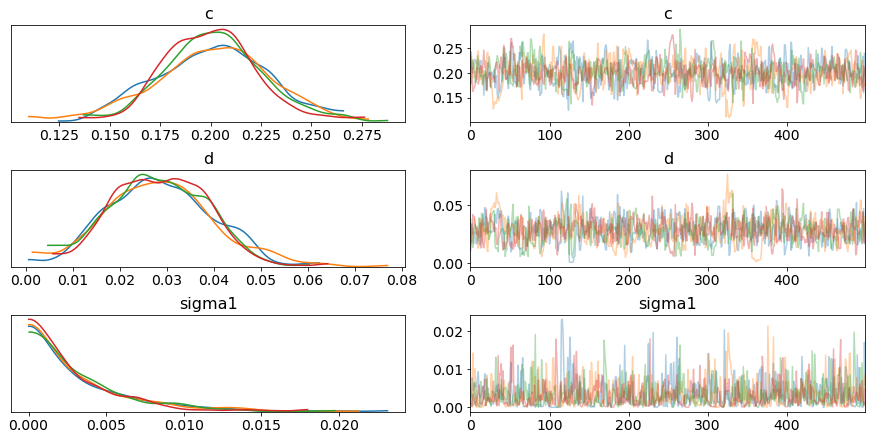

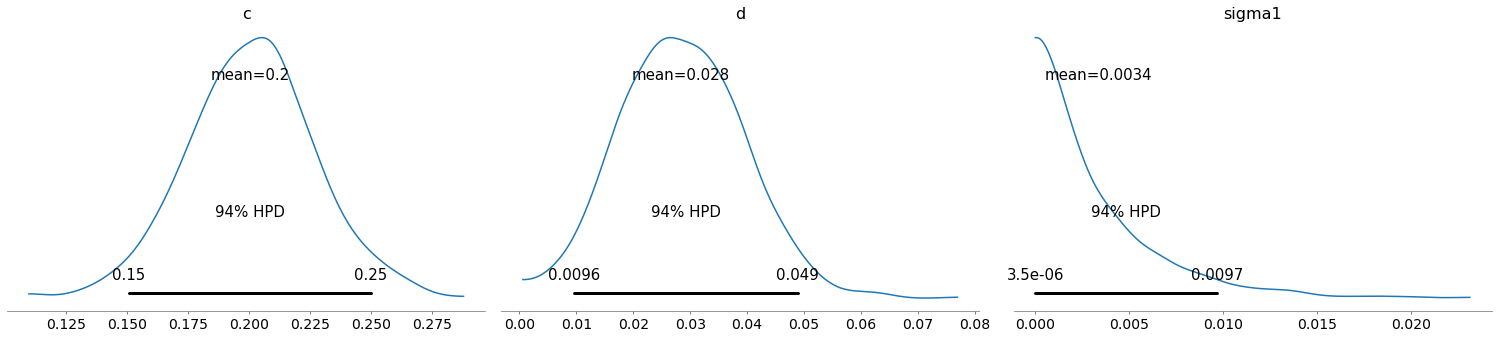

In [327]:
pm.traceplot(trace_lin2x2n)
pm.plot_posterior(trace_lin2x2n)

In [339]:
pm.summary(trace_lin2x2n, round_to=5)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
c,0.20050,0.02598,0.15062,0.24987,0.00104,0.00074,619.67567,619.67567,633.79692,461.89123,1.00997
d,0.02838,0.01071,0.00961,0.04884,0.00045,0.00032,566.28729,566.28729,552.39835,497.87121,0.99984
sigma1,0.00337,0.00347,0.00000,0.00969,0.00011,0.00007,1092.00097,1092.00097,767.34774,542.34515,1.00285


In [199]:
with pm.Model() as linear:
    c = pm.Flat('c')
    age = kudryavtsev['age'].values + 0.5
    sigma0 = kudryavtsev['2n_std'].values
    sigma1 = pm.HalfNormal('sigma1', 1)
    sigma = sigma0 + sigma1
    mu = lin(age, c)
    C14 = kudryavtsev['2n_mean'].values
    ploidy_2n = pm.Normal('ploidy', mu=mu, sigma=sigma, observed=C14)
    
    map_lin = pm.find_MAP()
    trace_lin = pm.sample(random_seed=42)

logp = 23.215, ||grad|| = 5.7293e-05: 100%|██████████| 51/51 [00:00<00:00, 1988.38it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma1, c]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1367.26draws/s]
The acceptance probability does not match the target. It is 0.8862095943846456, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9074224486709529, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8847442028873567, but should be close to 0.8. Try to increase the number of tuning steps.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f38953f81d0>,
      dtype=object)

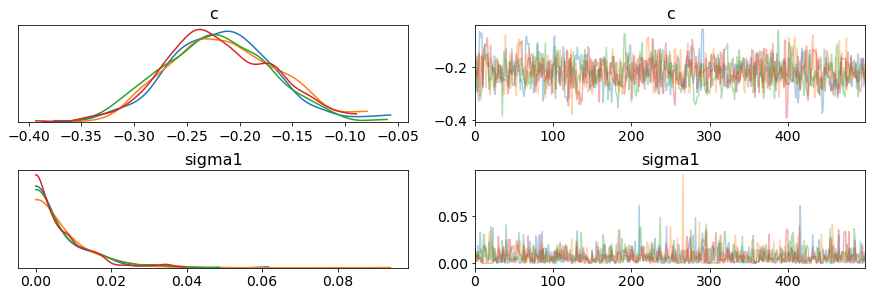

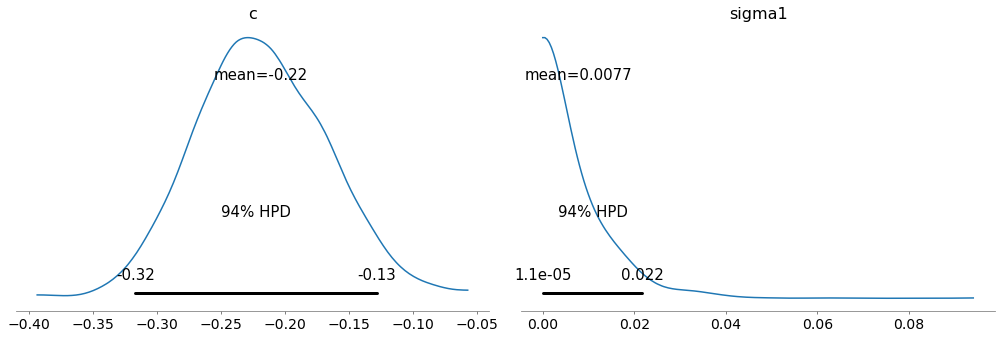

In [164]:
pm.traceplot(trace_lin)
pm.plot_posterior(trace_lin)

In [193]:
def quad(age, b, c):
    return 1 + c/100*age + b/100**2*age**2

In [194]:
with pm.Model() as quad_model:
    c = pm.Flat('c')
    b = pm.Flat('b')
    
    age = kudryavtsev['age'].values + 0.5
    sigma0 = kudryavtsev['2n_std'].values
    sigma1 = pm.HalfNormal('sigma1', 1)
    sigma = sigma0 + sigma1
    mu = quad(age, b, c)
    C14 = kudryavtsev['2n_mean'].values
    ploidy_2n = pm.Normal('ploidy', mu=mu, sigma=sigma, observed=C14)
    map_quad = pm.find_MAP()
    trace_quad = pm.sample(tune=4000, random_seed=42)

logp = 23.428, ||grad|| = 0.0058806: 100%|██████████| 40/40 [00:00<00:00, 2508.67it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma1, b, c]
Sampling 4 chains, 0 divergences: 100%|██████████| 18000/18000 [00:08<00:00, 2177.99draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f388474a5f8>,
      dtype=object)

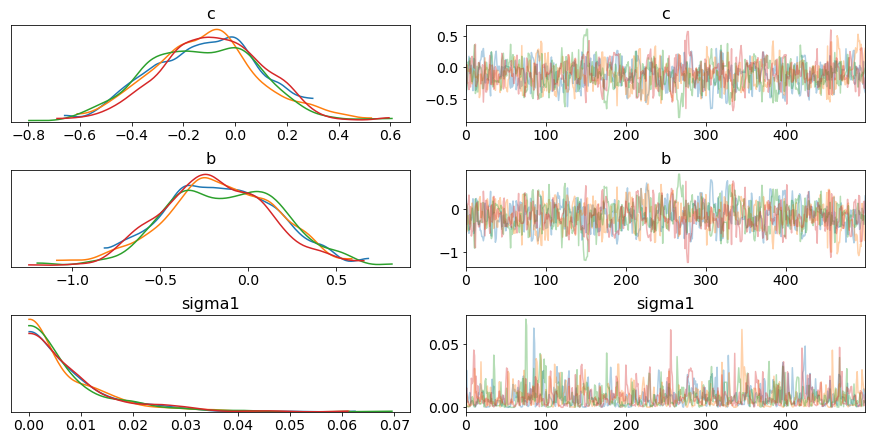

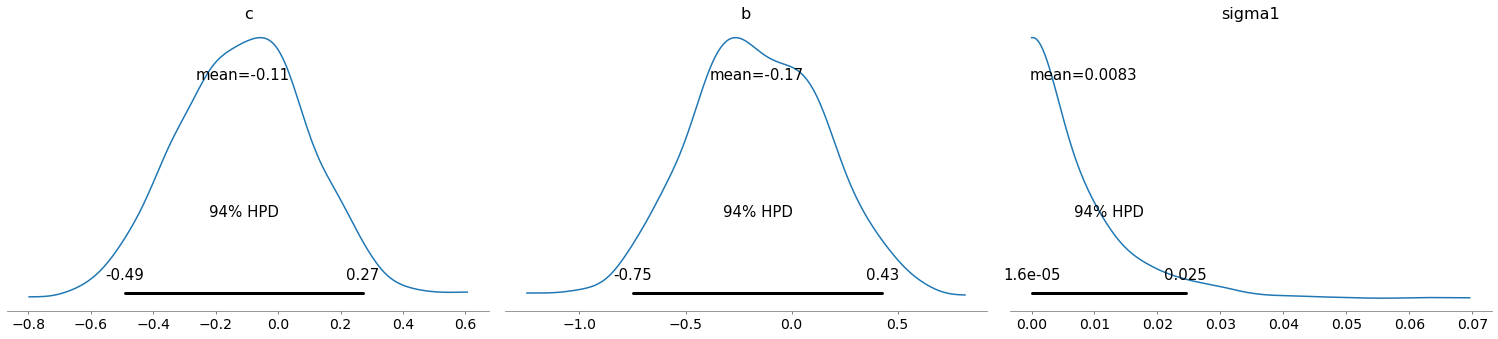

In [196]:
pm.traceplot(trace_quad)
pm.plot_posterior(trace_quad)

In [208]:
with pm.Model() as cubic_model:
    c = pm.Flat('c')
    b = pm.Flat('b')
    a = pm.Flat('a')
    
    age = kudryavtsev['age'].values + 0.5
    sigma0 = kudryavtsev['2n_std'].values
    sigma1 = pm.HalfNormal('sigma1', 1)
    sigma = sigma0 + sigma1
    mu = cubic(age, a, b, c)
    C14 = kudryavtsev['2n_mean'].values
    ploidy_2n = pm.Normal('ploidy', mu=mu, sigma=sigma, observed=C14)
    
    map_cubic = pm.find_MAP()
    trace_cubic = pm.sample(tune=2000, random_seed=42)

logp = 23.598, ||grad|| = 0.0027331: 100%|██████████| 37/37 [00:00<00:00, 3399.17it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma1, a, b, c]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [00:13<00:00, 722.58draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f38818b8470>,
      dtype=object)

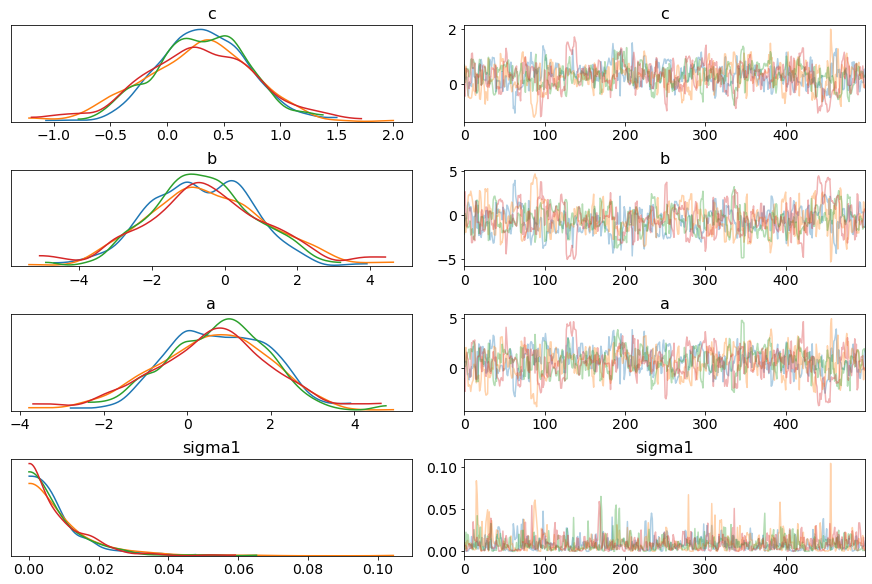

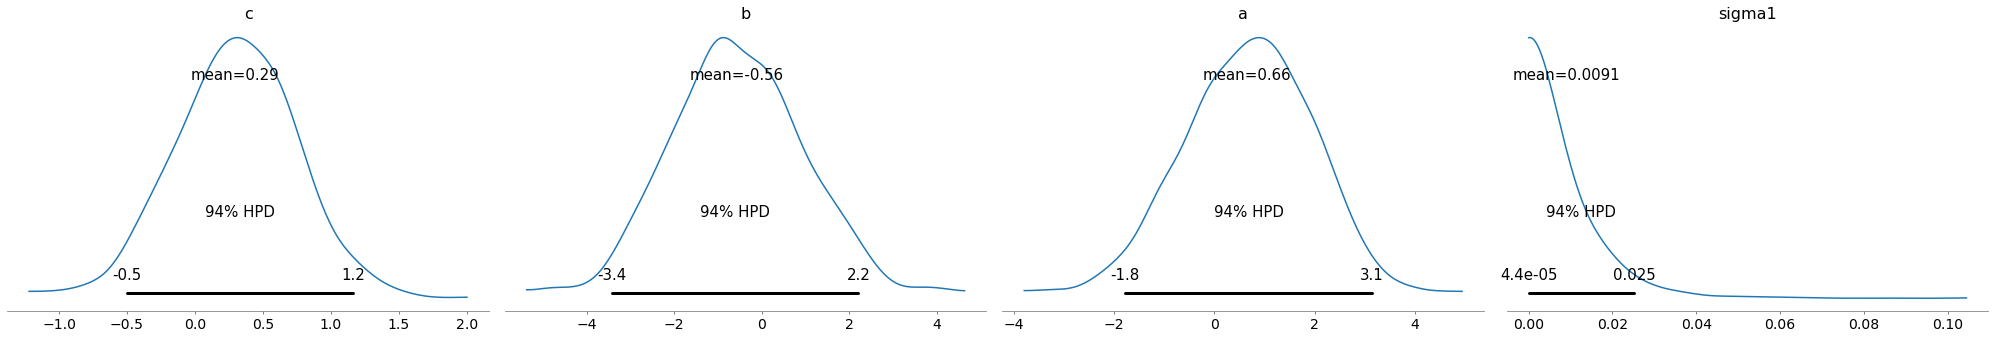

In [206]:
pm.traceplot(trace_cubic)
pm.plot_posterior(trace_cubic)

In [168]:
model_trace_dict = {'lin': trace_lin,
                    'quad': trace_quad,
                   'cubic': trace_cubic
                   }

In [169]:
pm.compare(model_trace_dict)

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
lin,0,-43.2587,0.30418,0,0.514863,2.62092,0,False,deviance
quad,1,-42.3309,0.449691,0.927757,0.323039,2.55541,0.28496,False,deviance
cubic,2,-40.92,0.786244,2.33866,0.162098,2.51662,0.590809,False,deviance


Linear is enough!

<ErrorbarContainer object of 3 artists>

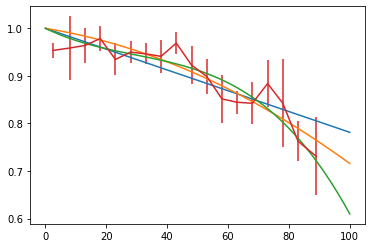

In [210]:
t = np.linspace(0, 100)
inds = np.random.randint(len(trace_lin), size=100)
# for ind in inds:
#     c = trace_lin[ind]['c']
#     plt.plot(t, lin(t, c), alpha=0.05, color='blue')
# for ind in inds:
#     c = trace_quad[ind]['c']
#     b = trace_quad[ind]['b']
#     plt.plot(t, quad(t, b, c), alpha=0.05, color='green')

plt.plot(t, lin(t, map_lin['c']))
plt.plot(t, quad(t, map_quad['b'], map_quad['c']))
plt.plot(t, cubic(t, map_cubic['a'], map_cubic['b'], map_cubic['c']))


plt.errorbar(kudryavtsev['age'].values, 
             kudryavtsev['2n_mean'].values, 
             kudryavtsev['2n_sem'].values, 
             label='data')

# Code for ploidy function in c14 module

In [211]:
import c14.models.liver

In [291]:
ploidy_data = pd.read_excel(c14.models.liver.default_path)
# +0.5 to reflect that we start simulations half a year before birth
ploidy_data['age'] = (ploidy_data[['age_min', 'age_max']].
                      mean(axis='columns')) + 0.5
ploidy_data /= 100.0
ploidy_data['age'] *= 100

def lin(t, b, c):
    return b * t + c

def quad(t, a, b):
    return a * t**2 + b * t + 1

(b_2n, c_2n), _ = sp.optimize.curve_fit(lambda t, b, c: lin(t, b, c), 
                                ploidy_data['age'].values, 
                                ploidy_data['2C_mean'].values)

ploidy = lambda t: lin(t, b_2n, 1)
dtploidy = b_2n

(b_2x2n, c_2x2n), _ = sp.optimize.curve_fit(lambda t, b, c: lin(t, b, c),
                                  ploidy_data['age'].values,
                                  ploidy_data['2Cx2_mean'].values)

ploidy2x2 = lambda t: lin(t, b_2x2n, 0)
# self.dtploidy2x2 = self.ploidy2x2.derivative()

In [293]:
b_2n, c_2n

(-0.00434184933600798, 0.9797512319379229)

In [283]:
b_2x2n

array([0.00243102])

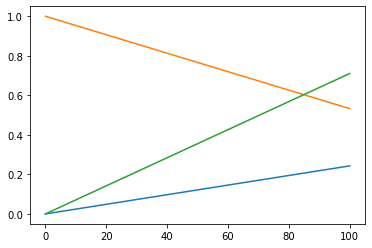

In [279]:
plt.plot(t, ploidy2x2(t))
plt.plot(t, ploidy(t))
plt.plot(t, 1-ploidy(t)+ploidy2x2(t))

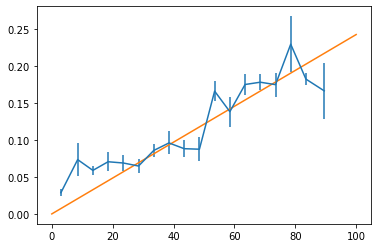

In [280]:
t = np.linspace(0, 100)
plt.errorbar(ploidy_data['age'].values, ploidy_data['2Cx2_mean'].values, ploidy_data['2Cx2_sem'].values, label='data')
# plt.plot(t, quad(t, a, b))
# plt.plot(t, lin(t, b2))
plt.plot(t, ploidy2x2(t))

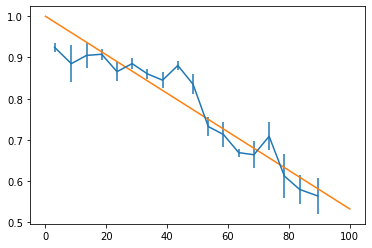

In [281]:
t = np.linspace(0, 100)
plt.errorbar(ploidy_data['age'].values, ploidy_data['2C_mean'].values, ploidy_data['2C_sem'].values, label='data')
plt.plot(t, ploidy(t))